In [ ]:
#Created by Beyza Balota, 31232
#12.03.2024

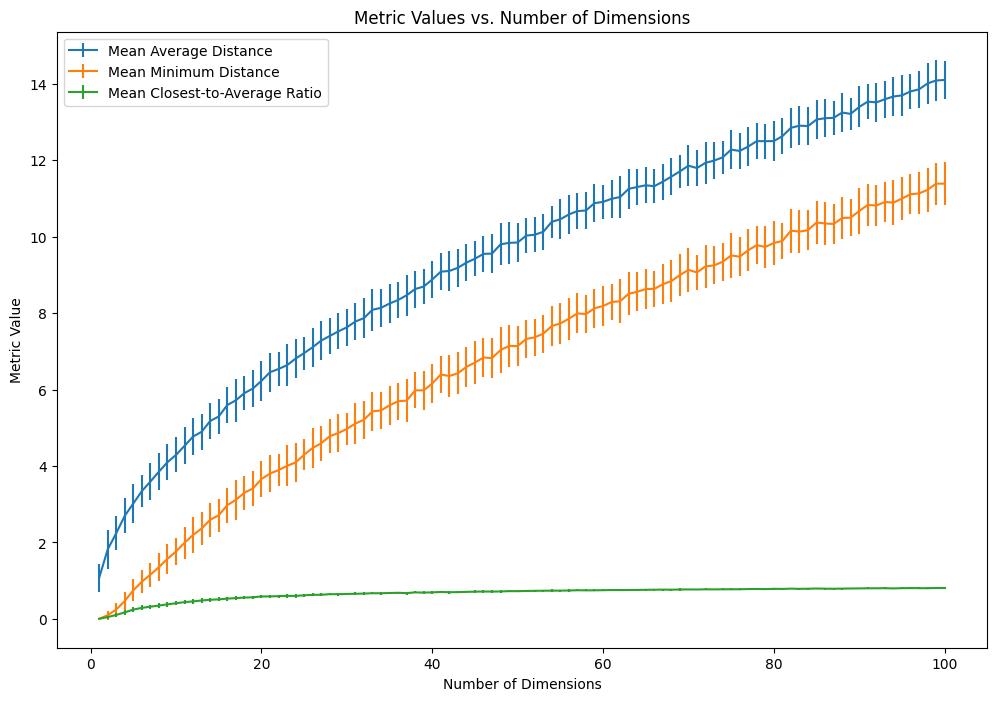

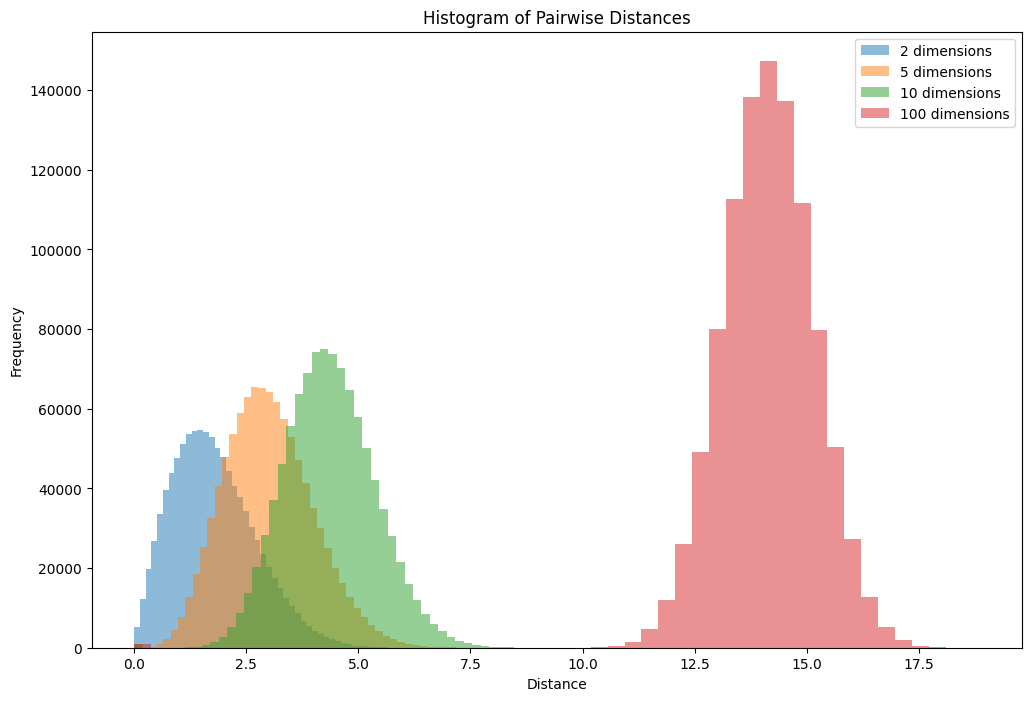

In [1]:
import numpy as np #to process large multidimensional arrays
import matplotlib.pyplot as plt #2D 3D plotting

# function for random points
def random_points(num_points, num_dimensions):
    return np.random.normal(size=(num_points, num_dimensions))

# function for average distance
def average_distance_sp(points, selected_point):
    distance= np.sqrt(((points-selected_point)**2).sum(axis=1))
    return np.mean(distance)

# function for minimum distance
def minimum_distance_sp(points, selected_point):
    distance= np.sqrt(((points-selected_point)**2).sum(axis=1))
    return np.min(distance[distance > 0]) # this distance > 0 is here to prevent calculating the distance of selected_point from itself, which is 0.

# function for closest to average ratio
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist/avg_dist

# function for analyzing dimensions
def analyze_dimensions(max_dim, num_points=1000, num_trials=100):
    mean_avg_distances = []
    mean_min_distances = []
    mean_ratios = []
    std_avg_distances = []
    std_min_distances = []
    std_ratios = []
    
    for d in range(1, max_dim + 1):
        avg_distances = []
        min_distances = []
        ratios = []
        for _ in range(num_trials):
            points = random_points(num_points, d)
            selected_point = points[np.random.randint(num_points)]
            avg_dist = average_distance_sp(points, selected_point)
            min_dist = minimum_distance_sp(points, selected_point)
            ratio = closest_to_average_ratio(min_dist, avg_dist)
            
            avg_distances.append(avg_dist)
            min_distances.append(min_dist)
            ratios.append(ratio)
        
        mean_avg_distances.append(np.mean(avg_distances))
        mean_min_distances.append(np.mean(min_distances))
        mean_ratios.append(np.mean(ratios))
        std_avg_distances.append(np.std(avg_distances))
        std_min_distances.append(np.std(min_distances))
        std_ratios.append(np.std(ratios))
    
    return (mean_avg_distances, mean_min_distances, mean_ratios,
            std_avg_distances, std_min_distances, std_ratios)

def plot_results(max_dim, mean_avg_distances, mean_min_distances, mean_ratios, std_avg_distances, std_min_distances, std_ratios):
    dimensions = range(1, max_dim + 1)
    plt.figure(figsize=(12, 8))
    
    plt.errorbar(dimensions, mean_avg_distances, yerr=std_avg_distances, label='Mean Average Distance')
    plt.errorbar(dimensions, mean_min_distances, yerr=std_min_distances, label='Mean Minimum Distance')
    plt.errorbar(dimensions, mean_ratios, yerr=std_ratios, label='Mean Closest-to-Average Ratio')
    
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Metric Value')
    plt.title('Metric Values vs. Number of Dimensions')
    plt.legend()
    plt.show()

def plot_histograms(points_sets):
    plt.figure(figsize=(12, 8))
    for d, points in points_sets.items():
        distances = np.sqrt(((points[:, np.newaxis] - points) ** 2).sum(axis=2)).flatten()
        plt.hist(distances, bins=50, alpha=0.5, label=f'{d} dimensions')
    
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pairwise Distances')
    plt.legend()
    plt.show()

# main analysis
max_dim = 100
mean_avg_distances, mean_min_distances, mean_ratios, std_avg_distances, std_min_distances, std_ratios = analyze_dimensions(max_dim)
plot_results(max_dim, mean_avg_distances, mean_min_distances, mean_ratios, std_avg_distances, std_min_distances, std_ratios)

# histograms for dimensions
points_sets = {
    2: random_points(1000, 2),
    5: random_points(1000, 5),
    10: random_points(1000, 10),
    100: random_points(1000, 100),
}
plot_histograms(points_sets)









Validation accuracy for k=1: 0.8486666666666667
Validation accuracy for k=3: 0.8524166666666667
Validation accuracy for k=7: 0.8539166666666667
Validation accuracy for k=12: 0.84825
Validation accuracy for k=20: 0.8426666666666667
Validation accuracy for k=30: 0.8345833333333333
Validation accuracy for k=50: 0.82425
Validation accuracy for k=75: 0.8159166666666666
Validation accuracy for k=100: 0.8083333333333333


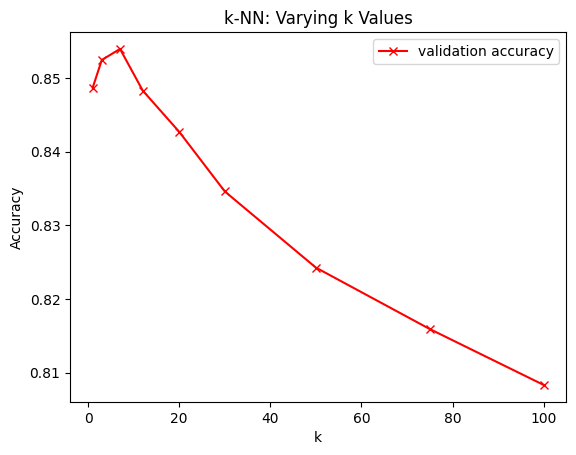

Test accuracy with optimal k=7: 0.854


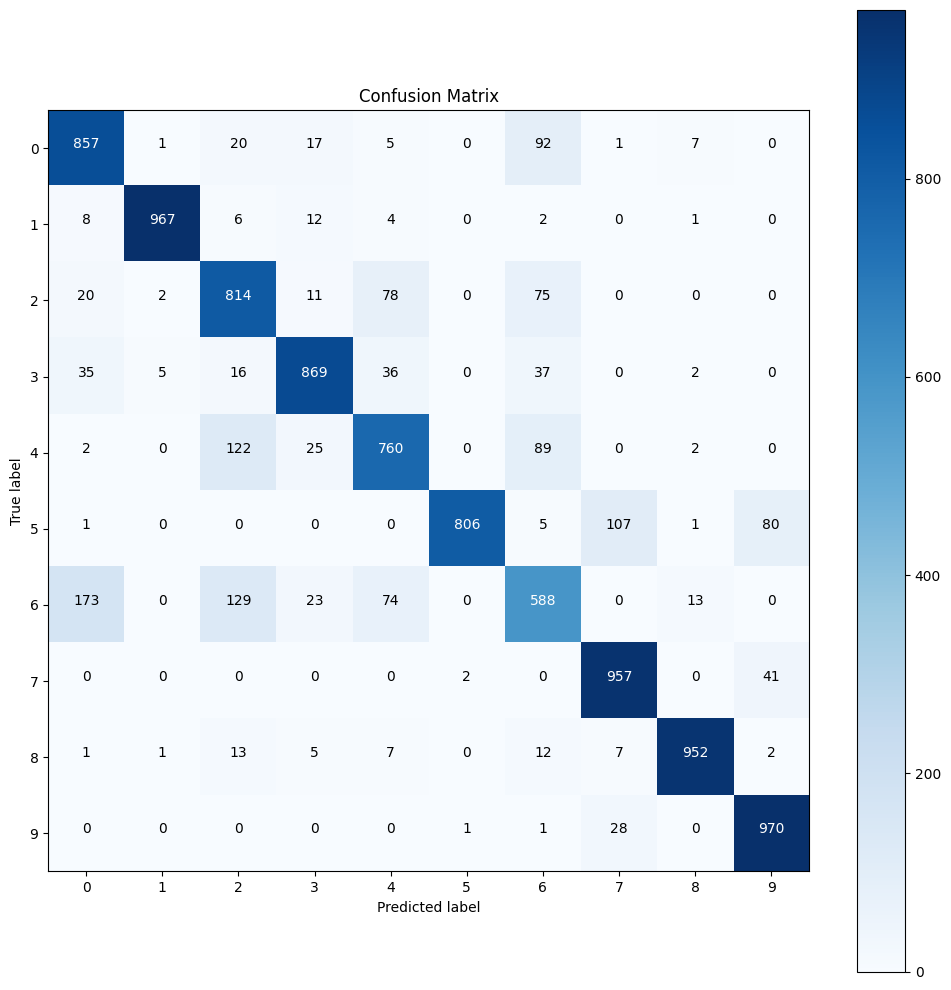

In [7]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


X_train_flat, X_val_flat, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# values of k to test
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]
accuracies = []

# finding the best k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, y_train)
    y_val_pred = knn.predict(X_val_flat)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    print(f'Validation accuracy for k={k}: {accuracy}')

# validation accuracy
plt.figure()
plt.plot(k_values, accuracies, "rx-", label="validation accuracy")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying k Values')
plt.legend()
plt.show()


optimal_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)

X_combined = np.vstack((X_train_flat, X_val_flat))
y_combined = np.hstack((y_train, y_val))
knn.fit(X_combined, y_combined)
y_test_pred = knn.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy with optimal k={optimal_k}: {test_accuracy}')

# confusion matrix with annotations
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

